In [202]:
from itertools import permutations, combinations

import numpy as np
import pandas as pd
np.set_printoptions(linewidth=200)

import matplotlib.pyplot as plt


In [162]:
a = pd.read_csv("matrix_euler_345.txt", header=None).to_numpy()

In [222]:
%%time
def euler_345(a):
    n=a.shape[0]
    A = {}
    for j in np.arange(n):
        A[j] = {}

    for k in np.arange(n):
        A[n-1][(k,)] = a[k,n-1]

    for j in np.arange(n-2, -1, -1):
        p_list = combinations(range(n), n-j)
        for p in list(p_list):
            A_list_tmp=[]
            for k in p:
                row_list= list(set(p) - set((k,)))
                row_list.sort()
                row_tuple = tuple(row_list)
                A_list_tmp.append(a[k, j] + A[j+1][row_tuple])
            A[j][p] = max(A_list_tmp)
    k0 = tuple(np.arange(n))
    return(A[0][k0])

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 16.2 µs


In [205]:
nb_traj=100
n_min = 2
n_max = 14
max_sum_list=[]

for n in np.arange(n_min, n_max+1):
    print(f"[{n}]", end="")
    for i in np.arange(nb_traj):
        a = np.random.normal(size=n*n).reshape((n,n))
        max_sum_list.append(pd.DataFrame({"n":[n], "max_sum":euler_345(a)}))

max_sum_df = pd.concat(max_sum_list)

[2][3][4][5][6][7][8][9][10][11][12][13][14][15]

In [206]:
z_df = max_sum_df.groupby("n").mean()

In [242]:
nb_traj=2000
n_min = 2
n_max = 100
max_sum_list=[]

for n in np.arange(n_min, n_max+1):
    print(f"[{n}]", end="")
    for i in np.arange(nb_traj):
        M = np.random.normal(size=n*n).reshape((n,n))
        C = np.max(M) - M
        row, col = lsa(C)
        max_sum = sum([M[row[i]][col[i]] for i in range(len(row))])
        max_sum_list.append(pd.DataFrame({"n":[n], "max_sum":max_sum}))

max_sum_df = pd.concat(max_sum_list)

[2][3][4][5][6][7][8][9][10][11][12][13][14][15][16][17][18][19][20][21][22][23][24][25][26][27][28][29][30][31][32][33][34][35][36][37][38][39][40][41][42][43][44][45][46][47][48][49][50][51][52][53][54][55][56][57][58][59][60][61][62][63][64][65][66][67][68][69][70][71][72][73][74][75][76][77][78][79][80][81][82][83][84][85][86][87][88][89][90][91][92][93][94][95][96][97][98][99][100]

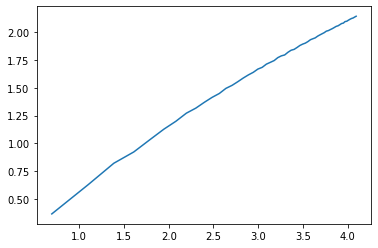

In [241]:
z_df = max_sum_df.groupby("n").mean()
z_df.reset_index(inplace=True)
z_df["ratio"] = z_df["max_sum"]/z_df["n"]
plt.plot(np.log(z_df["n"]), z_df["ratio"])

In [243]:
36*13

468